In [2]:
from sklearn.datasets import load_iris #資料集
from sklearn.model_selection import train_test_split #分割資料
from sklearn.cluster import KMeans #分群
from sklearn.cluster import DBSCAN #聚類
from sklearn.svm import SVC
from sklearn.decomposition import PCA #降維
import pandas as pd #資料表
import numpy as np #陣列


# 1. 載入資料
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
              columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']) #將data及target合併為新的陣列
X = data.drop(labels=['Species'],axis=1).values #移除Species列並取得剩下欄位資料
y = data['Species'].values #取得欄位資料並轉換成陣列(values)

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #將資料切分為訓練和測試資料

# 2. 使用 K-means 進行初始聚類
kmeans = KMeans(n_clusters=3, n_init='auto') #建立K-means模型，將資料分成3個簇、使用自動的初始值數量
kmeans_label_train = kmeans.fit_predict(X_train) #訓練模型並預測訓練資料的聚類標籤
kmeans_label_test = kmeans.predict(X_test) #模型已訓練好，僅需預測測試資料的聚類標籤

# 3. 使用 DBSCAN 進行進一步聚類
dbscan = DBSCAN(eps=0.3, min_samples=5) #建立DBSCAN模型，半徑=0.3、最小樣本數=5
dbscan_label_train = dbscan.fit_predict(X_train)
dbscan_label_test = dbscan.fit_predict(X_test)

# 4. 整合 K-means 和 DBSCAN 的結果作為 SVM 的輸入
X_train_combine = np.column_stack((X_train, kmeans_label_train, dbscan_label_train)) #將訓練資料和聚類標籤合併
X_test_combine = np.column_stack((X_test, kmeans_label_test, dbscan_label_test)) #將測試資料和聚類標籤合併

# 5. 降維
from sklearn.decomposition import PCA
pca = PCA(n_components=2, iterated_power=1) #將資料降至2維、只執行一次
train_reduced = pca.fit_transform(X_train_combine) #降維並轉換資料
test_reduced = pca.fit_transform(X_test_combine) #降維並轉換資料

# 6. 使用 SVM 進行分類
svm = SVC(kernel='linear', C=1)  # 建立SVM模型，用線性核函數、C:限制模型的複雜度
svm.fit(train_reduced, y_train)  # 帶入svm訓練模型
# 7. 對測試資料進行預測
predictions = svm.predict(test_reduced)  # 使用已訓練好的SVM模型，對測試資料進行分類預測
accuracy = svm.score(train_reduced, y_train) #計算準確率

print("預測結果:", predictions)
print("準確率:", accuracy)

預測結果: [1. 0. 2. 1. 1. 0. 0. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 1. 0. 2.
 2. 2. 2. 2. 0. 0.]
準確率: 0.975


In [ ]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



Text(0.5, 1.0, 'SVC with linear kernel\nAccuracy:0.97')

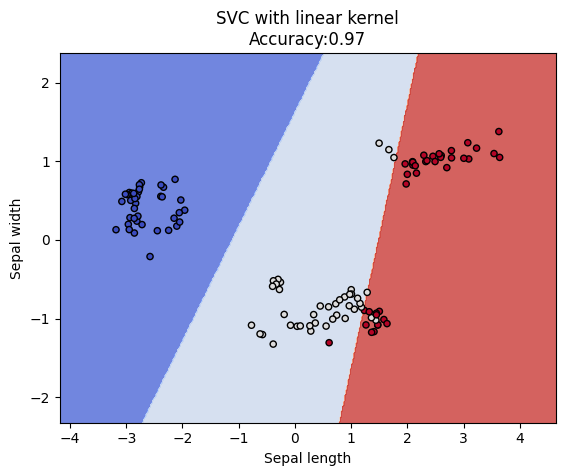

In [ ]:
import matplotlib.pyplot as plt
X0, X1 = train_reduced[:, 0], train_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(plt, svm, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVC with linear kernel'+ '\n' + 'Accuracy:%.2f'%accuracy)